# Search molecules from database

MolecularGraph.jl version: 0.10.0

- Activate the project and import MolecularGraph.

In [1]:
using Pkg
Pkg.activate("..")
using MolecularGraph

  Activating environment at `~/Repository/MolecularGraph.jl_notebook/Project.toml`
Path `../../MolecularGraph.jl` exists and looks like the correct package. Using existing path.
   Resolving package versions...
  No Changes to `~/Repository/MolecularGraph.jl_notebook/Project.toml`
  No Changes to `~/Repository/MolecularGraph.jl_notebook/Manifest.toml`


- Download public domain drug dataset provided by [DrugBank](https://drugbank.ca).
- Note: the data size is a bit large (25.2 MB).

In [2]:
# Create data directory
data_dir = "_data"
isdir(data_dir) || mkdir(data_dir)

# Fetch
dest = joinpath(data_dir, "zippedstructures.zip")
url = "https://www.drugbank.ca/releases/5-1-1/downloads/all-open-structures"
isfile(dest) || download(url, dest)

# Unzip
run(`unzip -n -d $data_dir　$dest`);

Archive:  _data/zippedstructures.zip


`sdfilereader` loads SDFile text data from the file, and generates array of molecule objects. In this tutorial, the first 2000 molecules were extracted from the file for the test.

Calling `precalculate!` prior to substructure search is highly recommended.

In [3]:
path =  joinpath(data_dir, "open structures.sdf")
mols = collect(Iterators.take(sdfilereader(path), 2000))
for mol in mols
    precalculate!(mol)
end

Then, define convenient function for substructure search. `parse(SMARTS, string)` converts SMARTS strings into query molecule objects. `hassubstructmatch(mol, query)` compares a molecule-query pair and returns true if they match.

In [4]:
function substrsearch(smarts)
    matched = []
    query = parse(SMARTS, smarts)
    for (i, m) in enumerate(mols)
        if hassubstructmatch(m, query)
            push!(matched, m)
            print("@")
        else
             print("+")
        end
        if i % 50 == 0
            println(i)
        end
    end
    println()
    return matched
end

substrsearch (generic function with 1 method)

## Substructure search


In [5]:
# Peroxide -O-O-
results1 = substrsearch("[OX2][OX2]")

println("$(length(results1)) records matched")

++++++++++++++++++++++++++++++++++++++++++++++++++50
++++++++++++++++++++++++++++++++++++++++++++++++++100
++++++++++++++++++++++++++++++++++++++++++++++++++150
++++++++++++++++++++++++++++++++++++++++++++++++++200
++++++++++++++++++++++++++++++++++++++++++++++++++250
++++++++++++++++++++++++++++++++++++++++++++++++++300
++++++++++++++++++++++++++++++++++++++++++++++++++350
++++++++++++++++++++++++++++++++++++++++++++++++++400
++++++++++++++++++++++++++++++++++++++++++++++++++450
++++++++++++++++++++++++++++++++++++++++++++++++++500
++++++++++++++++++++++++++++++++++++++++++++++++++550
++++++++++++++++++++++++++++++++++++++++++++++++++600
++++++++++++++++++++++++++++++++++++++++++++++++++650
++++++++++++++++++++++++++++++++++++++++++++++++++700
++++++++++++++++++++++++++++++++++++++++++++++++++750
++++++++++++++++++++++++++++++++++++++++++++++++++800
++++++++++++++++++++++++++++++++++++++++++++++++++850
++++++++++++++++++++++++++++++++++++++++++++++++++900
+++++++++++++++++++++++++++++

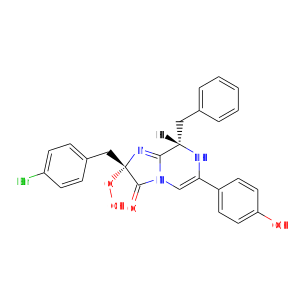

In [6]:
## Display one of the hit compounds
mol_svg = drawsvg(results1[1], 300, 300)
display("image/svg+xml",  mol_svg)

In [7]:
# Cephem core fused rings
results2 = substrsearch("C1C(=O)N2C=CCSC12")

println("$(length(results2)) records matched")

++++++++++++++++++++++++++++++++++++++++++++++++++50
++++++++++++++++++++++++++++++++++++++++++++++++++100
+++++++++++++++++++++++@++++++++++++++++++++++++++150
+++++++++++@++++++@+++++++++++++++++++++++++++++++200
++++++++++++++++++++++++++++++++++++++++++++++++++250
++++++++++++++++++++++++++++++++++++++++++++++++++300
++++++++++++++++++++@+++++++@+++++++++++++++++@+++350
+++++++++++++++++++++++++++++++++@++++++++++++++++400
++++++++++++++++++++++@+++++++++++++++++++++++++++450
++++@+++++++++++++++++++++++++++++++++++++++++++++500
++++++++++++++++++++++++++++++++++++++++++++++++++550
+++++++@+++++++++++++++++@++++++++++++++++++++++++600
++++++++++++++++++++++++++++++++++++++++++++++++++650
++++++++++++++++++++++++++++++++++++++++++++++++++700
++++++++++++++++@+++++++++++++++++++++++++++++++++750
++++++++++++++++++++++++++++++++++++++++++++++++++800
++++@+++++++++++++++++++++++++++++++++++++++++++++850
++++++++++++++++++++++++++++++++++++++++++++++++++900
+++++++++++++++++++++++++++++

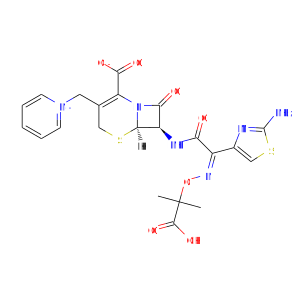

In [8]:
# Display one of the hit compounds
mol_svg = drawsvg(results2[5], 300, 300)
display("image/svg+xml",  mol_svg)